In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import seaborn as sns

from game import *
from utils import *
from plots import *
from agents import *
from T4T import *

palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif', rc={'font.size':12, 'mathtext.fontset': 'cm'})

DQN0 vs T4T0
DQN1 vs T4T0
DQN2 vs T4T0
DQN3 vs T4T0
DQN4 vs T4T0
DQN5 vs T4T0
DQN6 vs T4T0
DQN7 vs T4T0
DQN8 vs T4T0
DQN9 vs T4T0
DQN0 vs T4T0
DQN1 vs T4T0
DQN2 vs T4T0
DQN3 vs T4T0
DQN4 vs T4T0
DQN5 vs T4T0
DQN6 vs T4T0
DQN7 vs T4T0
DQN8 vs T4T0
DQN9 vs T4T0


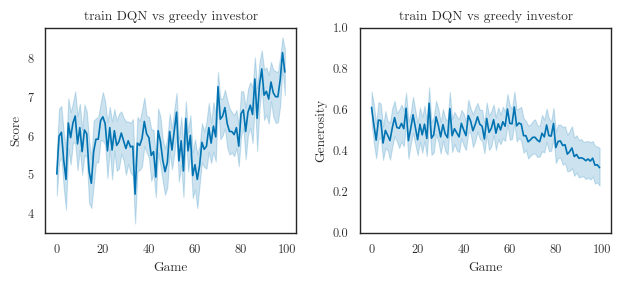

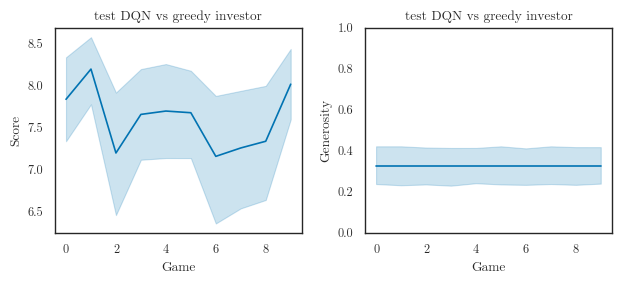

In [6]:
agents = 10
nGames_train = 100
nGames_test = 10
t4ts_train = make_greedy_trustees(nGames_train, seed=0)
t4ts_test = make_greedy_trustees(nGames_test, seed=1)

agents = [DQN(
        'investor',
        ID=f"DQN{n}",
        seed=n,
        n_neurons=3,
        alpha=0.019,
        gamma=0.3,
        explore='linear',
        tau=5,
        w_s=1.0,
        w_o=0.15,
        w_i=0.03,
        nGames=nGames_train
    ) for n in range(agents)]
agentIDs = [agent.ID for agent in agents]
data_train = run(agents, t4ts_train, 'investor', nGames=nGames_train, train=True)
data_test = run(agents, t4ts_test, 'investor', nGames=nGames_test, train=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='train DQN vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='train DQN vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_test.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_test.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='test DQN vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='test DQN vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

DQN0 vs T4T0
DQN1 vs T4T0
DQN2 vs T4T0
DQN3 vs T4T0
DQN4 vs T4T0
DQN5 vs T4T0
DQN6 vs T4T0
DQN7 vs T4T0
DQN8 vs T4T0
DQN9 vs T4T0
DQN0 vs T4T0
DQN1 vs T4T0
DQN2 vs T4T0
DQN3 vs T4T0
DQN4 vs T4T0
DQN5 vs T4T0
DQN6 vs T4T0
DQN7 vs T4T0
DQN8 vs T4T0
DQN9 vs T4T0


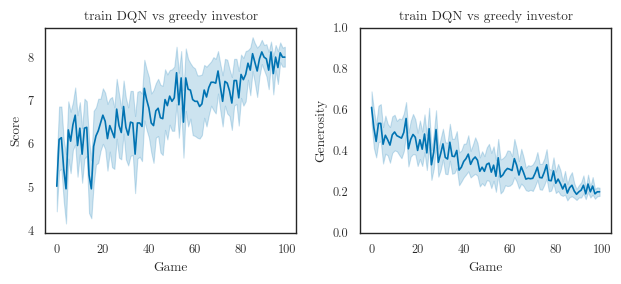

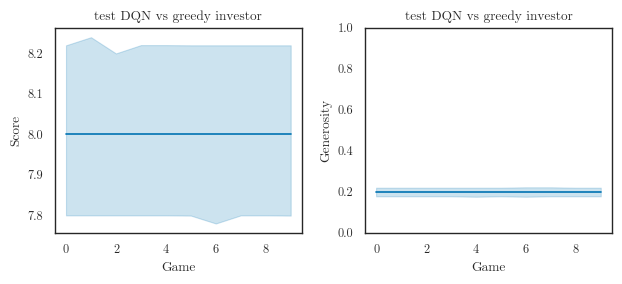

In [4]:
agents = 10
nGames_train = 100
nGames_test = 10
t4ts_train = make_greedy_trustees(nGames_train, seed=0)
t4ts_test = make_greedy_trustees(nGames_test, seed=1)

agents = [DQN(
        'investor',
        ID=f"DQN{n}",
        seed=n,
        n_neurons=100,
        alpha=0.1,
        gamma=0.9,
        explore='linear',
        tau=5,
        w_s=1.0,
        w_o=0.0,
        w_i=0.5,
        nGames=nGames_train
    ) for n in range(agents)]
agentIDs = [agent.ID for agent in agents]
data_train = run(agents, t4ts_train, 'investor', nGames=nGames_train, train=True)
data_test = run(agents, t4ts_test, 'investor', nGames=nGames_test, train=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='train DQN vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='train DQN vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_test.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_test.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='test DQN vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='test DQN vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

TQ0 vs T4T0
TQ1 vs T4T0
TQ2 vs T4T0
TQ3 vs T4T0
TQ4 vs T4T0
TQ5 vs T4T0
TQ6 vs T4T0
TQ7 vs T4T0
TQ8 vs T4T0
TQ9 vs T4T0
TQ0 vs T4T0
TQ1 vs T4T0
TQ2 vs T4T0
TQ3 vs T4T0
TQ4 vs T4T0
TQ5 vs T4T0
TQ6 vs T4T0
TQ7 vs T4T0
TQ8 vs T4T0
TQ9 vs T4T0


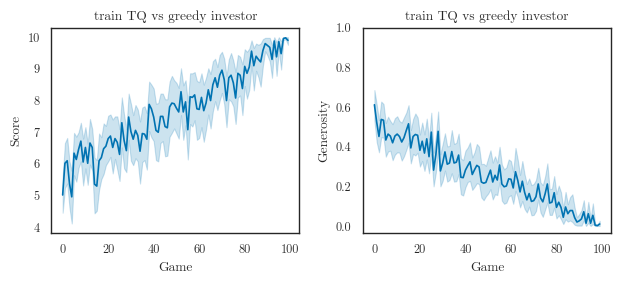

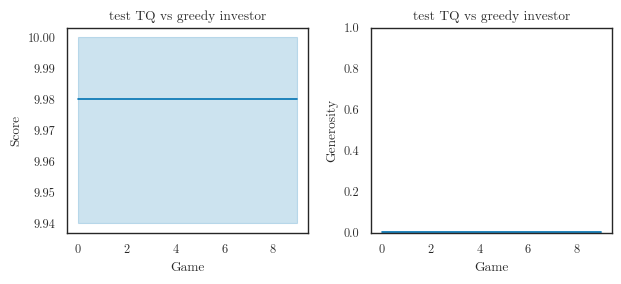

In [2]:
agents = 10
nGames_train = 100
nGames_test = 10
t4ts_train = make_greedy_trustees(nGames_train, seed=0)
t4ts_test = make_greedy_trustees(nGames_test, seed=1)

agents = [TQ(
        'investor',
        ID=f"TQ{n}",
        seed=n,
        alpha=1.0,
        gamma=0.9,
        explore='linear',
        update='Q-learning',
        tau=5,
        w_s=1.0,
        w_o=0.0,
        w_i=0.0,
        nGames=nGames_train
    ) for n in range(agents)]
agentIDs = [agent.ID for agent in agents]
data_train = run(agents, t4ts_train, 'investor', nGames=nGames_train, train=True)
data_test = run(agents, t4ts_test, 'investor', nGames=nGames_test, train=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='train TQ vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='train TQ vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_test.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_test.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='test TQ vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='test TQ vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

TQ0 vs T4T0
TQ1 vs T4T0
TQ2 vs T4T0
TQ3 vs T4T0
TQ4 vs T4T0
TQ5 vs T4T0
TQ6 vs T4T0
TQ7 vs T4T0
TQ8 vs T4T0
TQ9 vs T4T0
TQ0 vs T4T0
TQ1 vs T4T0
TQ2 vs T4T0
TQ3 vs T4T0
TQ4 vs T4T0
TQ5 vs T4T0
TQ6 vs T4T0
TQ7 vs T4T0
TQ8 vs T4T0
TQ9 vs T4T0


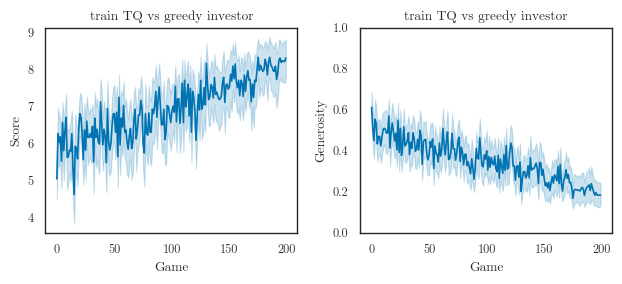

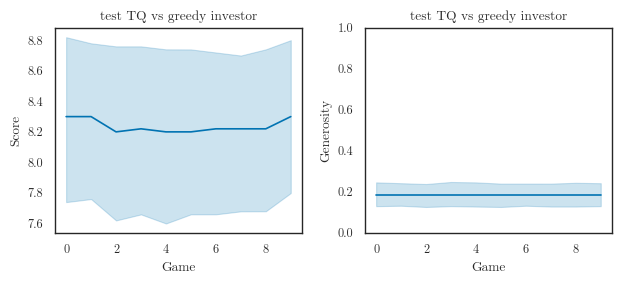

In [4]:
agents = 10
nGames_train = 200
nGames_test = 10
t4ts_train = make_greedy_trustees(nGames_train, seed=0)
t4ts_test = make_greedy_trustees(nGames_test, seed=1)

agents = [TQ(
        'investor',
        ID=f"TQ{n}",
        seed=n,
        alpha=1.0,
        gamma=0.9,
        explore='linear',
        update='SARSA',
        tau=5,
        w_s=1.0,
        w_o=0.0,
        w_i=0.0,
        nGames=nGames_train
    ) for n in range(agents)]
agentIDs = [agent.ID for agent in agents]
data_train = run(agents, t4ts_train, 'investor', nGames=nGames_train, train=True)
data_test = run(agents, t4ts_test, 'investor', nGames=nGames_test, train=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='train TQ vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='train TQ vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_test.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_test.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='test TQ vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='test TQ vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

# empirical

In [ ]:
emp = pd.read_pickle("human_data.pkl")
data = emp.query("orientation=='proself' & opponent=='greedy' & player=='investor'")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data, x='game', y='coins', ax=axes[0], color=palette[7])
sns.lineplot(data=data, x='game', y='generosity', ax=axes[1], color=palette[7])
axes[0].set(xlabel='Game', ylabel='Score', yticks=((5,6,7,8,9,10)))
axes[1].set(xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

xs = np.arange(0, 15, 1)
yN = 11
yN2 = 6
ys = np.linspace(0, 1, yN2)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 2)))
sns.histplot(data=data, x='game', y='generosity', bins=(15, yN), binrange=((0, 15),(0, 1)), ax=axes, color=palette[0])
axes2 = axes.twinx()
sns.lineplot(data=data, x='game', y='coins', ax=axes2, color=palette[1])
axes.set(ylabel="Generosity", title=f'proself humans vs. greedy trustee', xticks=xs, xlim=((0, 14)), yticks=ys, ylim=((min(ys), max(ys))))
axes2.set(ylabel='Score')
plt.tight_layout()